In [1]:
from decision_tree import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
anatel_file_path = '../../data/labeled_csv_files/Anatel_labeled.csv'
anatel = pd.read_csv(anatel_file_path)

### Encoding

In [3]:
# One-Hot Encoding
anatel = pd.get_dummies(anatel, columns=['Polarization'], prefix='Polarization')
anatel = pd.get_dummies(anatel, columns=['BasicFeatures'], prefix='BasicFeatures')
# Decision trees and random forests can handle boolean variables without encoding. They naturally make binary decisions based on the values of the features.

### Visualizing Correlation

In [ ]:
anatel_numeric = anatel.drop("SiteType", axis=1)
anatel_numeric.corr()

### Removing highly correlated columns

In [4]:
anatel = anatel.drop(columns = ["Polarization_V", "MinTxFreq", "MaxRxFreq", "BasicFeatures_G7W"])

### Removing columns of too little feature importance

In [13]:
# Must have created the feature_importance variable previously
features_of_little_importance = []
for i, importance in enumerate(feature_importances):
    if importance < 0.01:
        features_of_little_importance.append(feature_names[i])

In [14]:
anatel = anatel.drop(columns = features_of_little_importance)

### Running Decision Tree

In [5]:
# Proportion of the dataset to include in the test split
test_size = 0.2
# Controls the shuffling applied to the data before applying the split (pass int for reproducible output across multiple function 
# calls)
random_state = 42
# The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” 
# both for the Shannon information gain
criterion = 'entropy'
# The maximum depth of the tree. i=If None, then nodes are expanded until all leaves are pure or until all leaves contain less than 
# min_samples_split samples
max_depth = 10
# The minimum number of samples required to split an internal node
min_samples_split = 2
# The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at 
# least min_samples_leaf training samples in each of the left and right branches.
min_samples_leaf = 4

In [17]:
# Split data into features and target
X = anatel.drop("SiteType", axis=1)
y = anatel["SiteType"]

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Build and Train the Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=random_state, criterion=criterion, max_depth=max_depth, 
                                    min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
tree_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred = tree_model.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

c:\Users\AlexFidalgoZamikhows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AlexFidalgoZamikhows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AlexFidalgoZamikhows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [19]:
cm = confusion_matrix(y_test, y_pred)

In [20]:
feature_importances = tree_model.feature_importances_

In [21]:
scores = cross_val_score(tree_model, X, y)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_model, param_grid, cv=5)
grid_search.fit(X, y)

best_params = grid_search.best_params_


### Visualizing Results

In [22]:
print(f"Accuracy: {accuracy}")

print(F"\nClassification Report: \n {cr}")


Accuracy: 0.8444828213052172

Classification Report: 
               precision    recall  f1-score   support

         COW       0.43      0.36      0.39        28
    FASTSITE       0.00      0.00      0.00         3
  GREENFIELD       0.87      0.95      0.91      8509
 HARMONIZADA       0.36      0.15      0.22        26
      INDOOR       0.90      0.82      0.86       241
     OUTDOOR       0.48      0.39      0.43        33
 RAN SHARING       0.89      0.74      0.81       298
     ROOFTOP       0.62      0.39      0.48      1707
   SMALLCELL       0.90      0.78      0.83        55
 STREETLEVEL       0.70      0.63      0.66       102

    accuracy                           0.84     11002
   macro avg       0.62      0.52      0.56     11002
weighted avg       0.83      0.84      0.83     11002



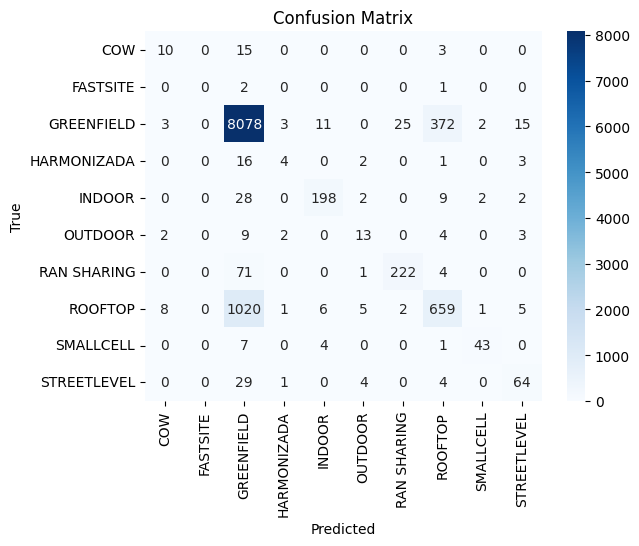

In [23]:
# Confusion Matrix
class_names = tree_model.classes_
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
print("Feature Importances:")
feature_names = X.columns
for i, importance in enumerate(feature_importances):
    print(f"{feature_names[i]}: {importance:.4f}")


Feature Importances:
MaxTxFreq: 0.1555
MinRxFreq: 0.1387
AntennaGain: 0.1140
FrontBackAntennaRation: 0.0158
AnguloMeiaPotenciaAntena_max: 0.0402
ElevationAngle: 0.0165
AntennaHeight: 0.2555
TransmitterPower: 0.0296
NecessaryBandwidth: 0.0390
WCDMA: 0.0173
DaysSinceLicensing: 0.0373
DaysSinceFirstLicensing: 0.1247
DaysUntilExpiration: 0.0160


In [25]:
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Cross-Validation Scores: [0.82194147 0.83292428 0.81074448 0.80047268 0.78429234]
Mean Accuracy: 0.8100750487871069
Standard Deviation of Accuracy: 0.016854085263333343


In [ ]:
print("Best Hyperparameters:", best_params)